Вам представлены данные об оттоке клиентов некоторого банка.

In [31]:
# Импортируем библиотеки и модули
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [32]:
# Save plot to image file instead of displaying it
from matplotlib import pyplot as plt


In [6]:
# Палитра matplotlib
#from matplotlib import colormaps
#list(colormaps)

In [22]:
# Считываем набор данных и просматриваем заголовок набора
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

1. RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
2. CustomerId — идентификатор клиента
3. Surname — фамилия клиента
4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
5. Geography — страна клиента (банк международный)
6. Gender — пол клиента
7. Age — возраст клиента
8. Tenure — сколько лет клиент пользуется услугами банка
9. Balance — баланс на счетах клиента в банке
10. NumOfProducts — количество услуг банка, которые приобрёл клиент
11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
13. EstimatedSalary — предполагаемая заработная плата клиента
14. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

→ Вам предстоит подготовить мини-отчёт о проделанной работе в виде ноутбука, который вы предоставите ментору для проверки. Отчёт должен содержать ответы на приведённые ниже вопросы в виде графика и подробных выводов, которые вы можете сделать, исходя из него.

→ Для визуализации вы можете использовать любую из изученных библиотек.

→ Перед выполнением задания обязательно подумайте, какие признаки в данных являются числовыми, а какие — категориальными. Это поможет вам построить правильный график (ещё раз взгляните на схему выбора графика).

![Py13_8_VisualisationChoose 2.png](<attachment:Py13_8_VisualisationChoose 2.png>)

→ При выполнении заданий обязательно придерживайтесь критериев правильной визуализации, приведённых в юните ([«Искусство визуализации»](<../SF_Notes/Py13/Py13_8.Art of Visualisation.ipynb>)).
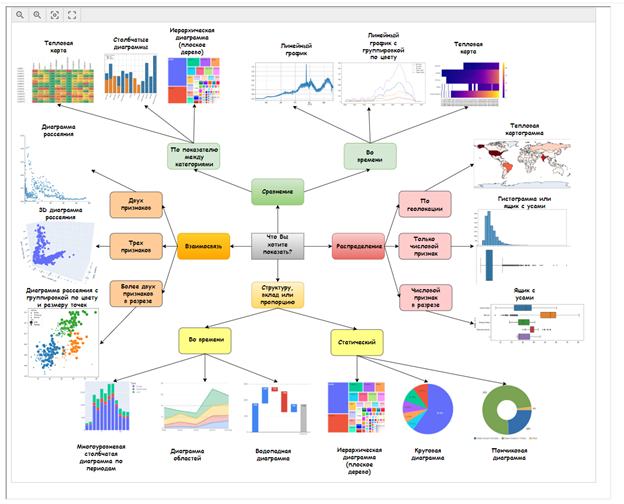

*  В файле должно содержаться 10 графиков — 10 ответов к заданиям.

* Каждый график и преобразования к нему выполняются в отдельной ячейке.

* Под графиком вы должны предоставить свой ответ на вопрос по нему и, если это требуется, выводы, которые вы можете сделать, исходя из графика.

### **ЗАДАНИЯ**

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

*Решение*


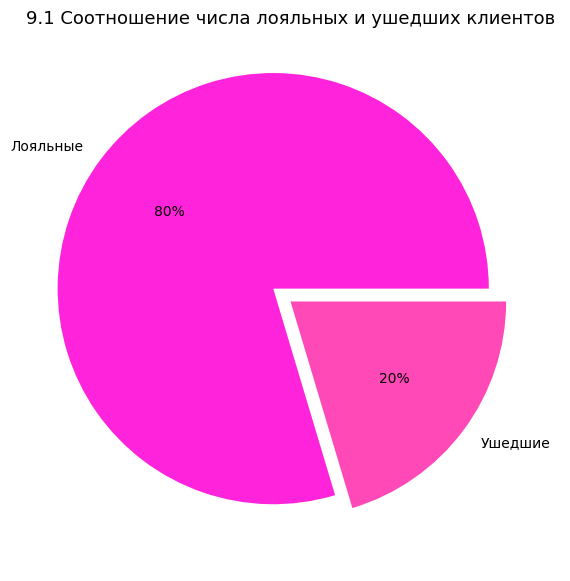

In [35]:
# Определяем количество ушедших и количество лояльных клиентов
loyal_and_gone = churn_data.groupby(['Exited'])['RowNumber'].count()
# Задаем параметры "пирога"
labels = ['Лояльные', 'Ушедшие']                                             # Список категорий сегментов круговой диаграммы
colors = sns.color_palette('spring')[0:7]                                    # Палитра цветов графика

plt.figure(figsize=(7,7), facecolor='white')                                 # Задаем ширину и высоту фигуры
plt.title('9.1 Соотношение числа лояльных и ушедших клиентов', size = 13)    # Заголовок диаграммы
plt.pie(loyal_and_gone , explode = [0.1, 0], labels = labels, colors = colors, autopct='%.0f%%') # Строим круговую диаграмму
#plt.savefig('Images/9.1.png')                                               # Сохраняем рисунок в папку Images
plt.show()                                                                   # Вывод графика на экран
#print(loyal_and_gone)                                                       # Количество ушедших и количество лояльных клиентов

*Заключение*

Исходя из графика, каждый пятый клиент прекращает сотрудничество с банком

_______

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

*Решение*

In [36]:
# Опрежеляем клиентов, у которых на счету больше $2500
clients_filtered = churn_data[churn_data['Balance'] > 2500] 

# Формируем и выводим гистограмму
fig = px.histogram(
    data_frame=clients_filtered,                                               # Набор данных для диаграммы
    x='Balance',                                                               # Столбец с данными по оси х
    color_discrete_sequence = ['fuchsia'],                                     # Палитра цветов графика
    height=500,                                                                # Высота диаграммы
    width=800,                                                                 # Ширина диаграммы
    title = '9.2 Клиенты с балансом счета больше $2500',                       # Название диаграммы
    nbins=60                                                                   # Диапазон равных интервалов
)
fig.update_xaxes(title_text='Баланс')                                          # Обновляем метку по оси x
fig.update_yaxes(title_text='Количество клиентов')                             # Обновляем метку по оси y
#fig.write_image('Images/9.2.png')                                             # Сохраняем рисунок в папку Images
fig.show()                                                                     # Вывод графика на экран

*Заключение*

Большая часть клиентов банка имеет остаток на счету $100k-$150k. Наименьшее количество клиентов банка имеют остаток свыше $200k, или от $10k и ниже.


___
9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.


In [10]:
# Формируем и выводим гистограмму
fig = px.histogram(
    data_frame=churn_data,                                                      # набор данных для диаграммы
    x='Balance',                                                                # столбец с данными по оси х
    color='Exited',                                                             # столбец с данными для цветовой гаммы
    color_discrete_sequence = ['yellow', 'fuchsia'],                            # Палитра цветов графика
    height=500,                                                                 # высота диаграммы
    width=800,                                                                  # ширина диаграммы
    histfunc='count',                                                           # данные для визуализации одномерного распределения агрегатной функции
    title='9.3 Баланс в разрезе признака оттока клиентов:1-ушедший,0-лояльный', # заголовок диаграммы
    nbins = 20                                                                  # диапазон равных интервалов
)
fig.update_xaxes(title_text='Баланс')                                           # обновляем метку по оси x
fig.update_yaxes(title_text='Количество клиентов')                              # обновляем метку по оси y
#fig.write_image('images/9.3.png')                                              # Сохраняем рисунок в папку Images
fig.show()                                                                      # вывод графика на экран


*Заключение*

1. Общая картина соотношения лояльных и ушедших клиентов имеет эдентичный вид.
1. Из графика видно, что состояние счетов трети клиентов (1-ушедший, 0-лояльный) не превышает $10k,т.е. более 3.5 тыс человек имеют нулевой баланс, либо не превышающий $10k 
2. Основная часть клиентской базы - это состоятельные клиенты с балансом $90-150k
     *  общее количество клиентов банка, см. 9.1 - порядка 10 тыс чел, из них пятая часть это ушедшие клиенты, в т.ч.ушедшие и продолжающие хранить средства на счетах
     * в т.ч. такие клиенты (ушедшие) попадают в основную массу всей клиентской базы, с остатками по счетам в среднем $90-150k

3. Наименшую часть составляют счета с максимальным (более $150k) или минимальным балансом (близком к нулю), с примерно равным соотношением счетов с max и min балансом.

*Рекомендации*

1. Необходимо обратить внимание на клиентов с остатком по счетам не более $10k. Они состовляют **третью часть** клиентской базы банка, их необходимо заинтересовать хранить средства в этом банке, нпр. выгодные ставки по инвестиционным продуктам и вкладам. Возможно, рынок предлагает более интересные предложения по накопительным счетам, или люди копили на крупные покупки и совершили их. 

2. Обратить внимание на ушедших клиентов, которые продолжают хранить денежные средства в банке. в т.ч предложить для них другие инвестиционные продукты с выгодными условиями или выгодные условия cashback, чтобы заинтересовать их вернуться. 
     *  необходим в т.ч. допольнительный анализ причин оттока клиентов, чтобы подобрать наиболее интересное для них предложение, а так же, чтобы снизить отток клиентов в будущем

3. Создать для основной части (состоятельные клиенты, с балансом $90-150k) программу лояльности, что, в т.ч. должно заинтересовать ушедших клиентов либо вернуться, либо продолжать оставаться лояльным клиентом банка, не уходить в будущем.  


___
9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

*Решение* 


In [38]:
# Формируем и выводим коробчатую диаграмму
age_image = px.box(
    data_frame=churn_data,                                                     # Набор данных для диаграммы
    x='Age',                                                                   # Столбец с данными по оси х
    color='Exited',                                                            # столбец с данными для цветовой гаммы
    color_discrete_sequence = ['yellow', 'fuchsia'],                           # Палитра графика
    height=500,                                                                # Высота диаграммы
    width=800, # ширина диаграммы
    title='9.4 Распределение возраста в разрезе признака оттока: 1-ушедшие, 0-лояльные', # Заголовок диаграммы
)

#fig.write_image('images/9.4.png')                                             # Сохраняем рисунок в папку Images
age_image.show()                                                               # Вывод графика на экран

*Заключение*

Из графика видно, что основную часть активных (лояльных) клиентов составляют люди в возрасте 30-40 лет. В возрасте 40-50 лет происходит максимальный отток клинентов (ушедшие).

так же, стоит обратить внимание, что большое количество пожилых людей (в возрасте  от 57 и выше), продолжают оставаться лояльными клиентами банка. Так же, можно отметить небольшое количество ушедших клиентов старше 80 лет, вероятно, это умершие люди. 

Здесь, можно предположить, что у банка есть выгодные условия пенсионных накоплений, и нет привлекательного продукта накоплений для активно работающей группы населения предпенсионного возраста.  Исходя из этих данных, реклмендовано обратить внимание:

1.  на группу клиентов в возрасте 30-40 лет, привентивно предложить им условия инвестиционных продуктов и накопительных счетов, чтобы они продолжили оставаться лояльными клиентами банка по достижении 40 лет.

2. проанализировать причины оттока клиентов в возрасте 40-50 лет, возможно, предложить им более выгодные условия хранения накоплений, инвестиционных продуктов (в т.ч. и пенсионных накоплений), чтобы снизить имеющийся поток снижения количества лояльных клиентов


___

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

*Решение*

In [36]:
# Формируем и выводим диаграмму рассеяния
fig = px.scatter(
    data_frame=churn_data,                                            # Набор данных для диаграммы
    x='EstimatedSalary',                                              # Столбец с данными по оси х
    y='CreditScore',                                                  # Столбец с данными по оси у
    color='Exited',                                                   # Столбец с данными для цветовой гаммы
    color_continuous_scale=['fuchsia', 'yellow', 'green'],            # Салитра цветов
    height=500,                                                       # Высота диаграммы
    width=800,                                                        # Ширина диаграммы
    title='9.5 Взаимосвязь кредитного рейтинга и предполагаемой зарплаты',# Заголовок диаграммы
)
fig.update_xaxes(title_text='Предполагаемая зарплата')                   # Название оси x
fig.update_yaxes(title_text='Кредитный рейтинг')                         # Название оси y
#fig.write_image('images/9.5.png')                                       # Сохранение графика в папку Images
fig.show()                                                               # Вывод графика на экран

*Заключение*

Хаотичность графика свидетельствует о том, что связи между размером заработной платы клиентов банка и их кредитным рейтингом нет, в т.ч. видно, что это справедливо ко всем клиентам банка, не зависимо от статуса лояльности.

___
9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

*Подсказка*

Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

*Решение*

In [29]:
# Формируем данные для диаграммы
exit_by_gender = churn_data.groupby(['Gender'])['Exited'].mean()     # Доля ушедших клиентов по половому признаку

# Формируем и выводим столбчатую диаграмму
fig = px.bar(
    data_frame=exit_by_gender ,                                      # Набор данных для диаграммы
    x=exit_by_gender.index,                                          # Данные по оси х
    y='Exited',                                                      # Столбец с данными по оси у
    height=500,                                                      # высота диаграммы
    width=800,                                                       # Ширина диаграммы
    title='9.6 Доли ушедших клиентов по половому признаку',          # Заголовок диаграммы
    color_discrete_sequence = ['fuchsia'],                           # Цветовая гамма диаграммы
)
fig.update_xaxes(title_text='Пол клиента')                            # Название оси x
fig.update_yaxes(title_text='Ушедшие клиенты')                        # Название оси y
#fig.write_image('Images/9.6.png')                                    # Сохранение графика в папку Images
fig.show()                                                            # Вывод графика на экран
#print(exit_by_gender)                                                # Вывод на экран доли ушедших клиентов в числовом формате

*Заключение*

Из графика видно, что клиенты-женщины чаще уходят из банка (25% ушедших клиентов), чем клиенты-мужчины (16%)


___

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

*Решение*


In [12]:
# Формируем данные для диаграммы
churn_data['Loyal'] = 1 - churn_data['Exited'] # Доля лоялиных клиентов
grouped_by_exit = churn_data.groupby(['NumOfProducts'])[['Exited', 'Loyal']].sum() # данные по клиентам и числу приобретённых услуг

# Формируем и выводим столбчатую многоуровненвую диаграмму
fig = px.bar(
    data_frame=grouped_by_exit,                                                    # Набор данных для диаграммы
    x=grouped_by_exit.index,                                                       # Данные по оси х
    y=['Exited', 'Loyal'],                                                         # Данные по оси y
    height=500,                                                                    # Высота диаграммы
    width=800,                                                                     # Ширина диаграммы
    title='9.7 Зависимость оттока клиентов от числа приобретённых услуг',          # Заголовок диаграммы
    color_discrete_sequence = ['yellow', 'fuchsia'],                               # Цветовая гамма для разделения категорий 
)

fig.update_xaxes(title_text='Приобретенные услуги')                        # Название оси x
fig.update_yaxes(title_text='Количество клиентов')                         # Название оси y
#fig.write_image('Images/9.7.png')                                         # Сохранение графика в папку Images
fig.show()                                                                 # Вывод графика на экран
#print(grouped_by_exit)                                                    # Вывод числовых показателей по клиентам и числу приобретённых услуг

*Заключение*

Из графика можно сделать вывод, что большая часть активных клиентов пользуется двумя приобретенными услугами банка (4242 человек). Не многим меньшее количество активных клиентов пользуется одной приобретенной услугой банка (3675 человек)

Клиенты, которые имели максимальное количество приобретенных услуг (4 услуги) банка составялют не значительную часть и являются ушедшими (60 человек). Действующих клиентов с максимальным пакетом приобретенных услуг - нет. 

Так же можно отметить, что большую часть ушедших клиентов составляют те, которые приобретали одну услугу банка (1409 человек). Отток клиентов с 2-3 пакетами приобретенных услуг менее значителен. 

Доля активных клиентов, которые приобрели 3 услуги крайне мала и составляет 46 человек. 


____
9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

*Решение*


In [27]:
# Формируем данные для диаграммы
active_member_status = churn_data.groupby(['IsActiveMember'])[['Exited', 'Loyal']].sum()   # Данные наличия статуса активного клиента
# Формируем и выводим столбчатую многоуровненвую диаграмму
fig = px.bar(
    data_frame=active_member_status,                                                       # Набор данных для диаграммы
    x=active_member_status.index,                                                          # Данные по оси х
    y=['Exited', 'Loyal'],                                                                 # Данные по оси y
    height=500,                                                                            # Высота диаграммы
    width=800,                                                                             # Ширина диаграммы
    title='9.8 Влияние статуса активного клиента на отток клиентов',                       # Заголовок диаграммы
    color_discrete_sequence = ['yellow', 'fuchsia'],                                       # Цветовая гамма для разделения категорий 
)
fig.update_xaxes(title_text='Cтатус активного клиента (0 — нет, 1 — да)')                  # Название оси x
fig.update_yaxes(title_text='Количество клиентов')                                         # Название оси y
#fig.write_image('images/9.8.png')                                                         # Сохранение графика в папку Images
fig.show()                                                                                 # Вывод графика на экран


*Заключение*

Среди активных клиентов отток примерно в 2 раза ниже, чем среди неактивных. При этом количество лояльных неактивных клиентов не значительно ниже лояльных активных. Здесь, стоит уточнить значение статуса активности, если это предполагает, что активный клиент - это клиент активно пользующийся счетом (регулярно осуществялет операции по счету, имеет активный пополняемый остаток), тогда можно рекомендловать следующее:

1. стимулировать неактивных лояльных клиентов совершать операции через счет банка;

2. обратить внимание на активных - ушедших клиентов, предложить им условия возвращения;

3. так же, провести дополнительный анализ неактивных ушедших клиентов с т.з. баланска счета, и в т.ч. (см.п.2), в случае положительного баланса, создать им условия возврата. 

Здесь в целом, для всех категорий анализируемых клиентов, вероятно необходимо разрабортать выгодные программы cashback, выплаты процентов на остатки, системы скидок при оплате картой и т.д., чтобы стимулировать активно пользоваться услугами банка. 

_____
9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

*Решение*

In [16]:
# Формируем данные для тепловой картограммы по странам  
country_exited = churn_data.groupby(['Geography'])['Exited'].mean()        # Доля ушедших клиентов по географическому признаку
 
# Формируем и выводим тепловую картограмму
fig = px.choropleth(
    data_frame=country_exited,                                             # Набор данных для картограммы
    locations=country_exited.index,                                        # Столбец, из которого берутся локации (столбец со странами)
    locationmode = "country names",                                        # Режим геопривязки: как будет производиться сопоставление данных с картой в Plotly
    color="Exited",                                                        # Столбец с данными для цветовой гаммы
    range_color=[1, 3],                                                    # Диапазон изменения цвета
    title='Доля ушедших клиентов по географическому признаку',             # Название картограммы
    height=500,                                                            # Высота графика
    width=800,                                                             # Ширина графика
    color_continuous_scale=['fuchsia', 'yellow']                           # Палитра цветов картограммы
    )
#fig.write_image('images/9.9.png')                                         # Сохранение графика в папку Images
fig.show()                                                                 # Вывод графика на экран
#print(choropleth_data)                                                    # Выводим числовые показатели на экран

*Заключение*

Максимальный отток клиентов произешел в Германии (32%), примерно поровну в Испании и Франции (16-17%). Вероятно на высокий процент оттока коиентов в Германии могли повлиять каие-то социано-экономические процеесы, происходящие в стране. Стоит провести дополнительное исследование,  чтобы выяснить, по какой причине в Германии клиенты чаще в 2 раза отказывались от услуг банка, чем в других странах. 



___
9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

*Решение*

In [11]:
# Функция преобразования кредитного рейтинга в категорию
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
# Преобразуем кредитный рейтинг в категорию 
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
#print(churn_data)                                                                 # Выводим числовые показатели на экран

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.


In [12]:
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
pivot_creditscore_yrs = churn_data.pivot_table(values ='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean')
print(pivot_creditscore_yrs)

Tenure                0         1         2         3         4         5   \
CreditScoreCat                                                               
Excellent       0.275000  0.208333  0.137255  0.168317  0.131868  0.233333   
Fair            0.217391  0.215596  0.213043  0.216450  0.197248  0.206897   
Good            0.203822  0.203608  0.187342  0.205962  0.195122  0.214470   
Poor            0.226415  0.259398  0.211765  0.212245  0.233202  0.199153   
Very_Poor       0.444444  0.253731  0.151515  0.285714  0.293103  0.149254   

Tenure                6         7         8         9         10  
CreditScoreCat                                                    
Excellent       0.241379  0.127660  0.196078  0.270833  0.254902  
Fair            0.236364  0.171103  0.209016  0.190045  0.205357  
Good            0.182857  0.191892  0.152355  0.194667  0.197802  
Poor            0.179916  0.151261  0.214575  0.251082  0.169492  
Very_Poor       0.225352  0.206349  0.253521  0.229


На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

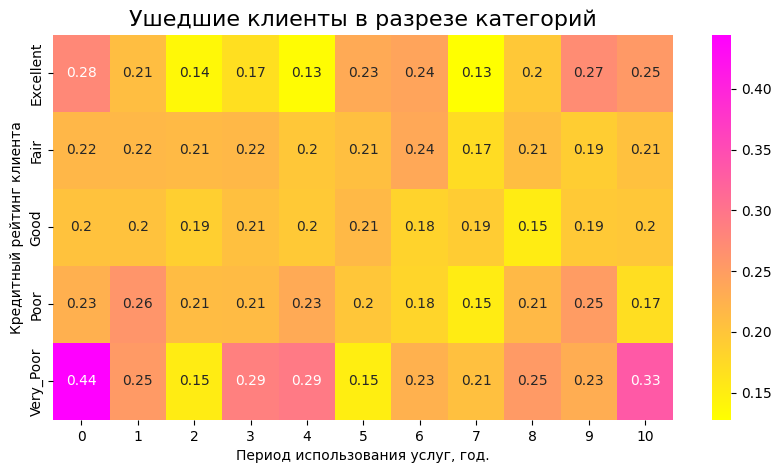

In [30]:
# Строим тепловую диаграмму
plt.figure(figsize=(10,5))                                                         # Задаем ширину и высоту фигуры 
credit_score_map = sns.heatmap(                                                    # Данные для построения графика
    data=pivot_creditscore_yrs,                                                    # DataFrame
    cmap= 'spring_r',                                                              # Цветовая схема
    annot=True,                                                                    # Добавляем значение каждой ячейки в качестве аннотации к тепловой карте
    )
credit_score_map.set_ylabel('Кредитный рейтинг клиента')                           # Название оси y
credit_score_map.set_xlabel('Период использования услуг, год.')                    # Название оси х
credit_score_map.set_title('Ушедшие клиенты в разрезе категорий', fontsize=16);    # Название графика
plt.savefig('Images/9.10.png')                                                     # Сохранение графика в папку Images                                  
plt.show()                                                                         # Вывод графиков на экран


*Заключение*

Наиболее высокие доли оттока клиентов наблюдаются в категории Very Poor (44 процента для тех, кто пользовался услугами банка менее года, и 33 процента для тех, кто с банком 10 лет и более)

В категории с наивысшим кредитным рейтингом Excellent 28 процентов клиентов, пользовавшихся услугами банка до года, прекратило сотрудничество с банком.